# <font color='purple'> **Procesamiento de imágenes** </font>

**Elaborado por:** Scarlett Magdaleno Gatica

En este notebook se explorarán diversas bibliotecas en Python para el procesamiento digital de imágenes, y se aplicarán 5 de ellas.

## <font color='purple'> **1. OpenCV** </font>

### <font color='purple'> **1.1 Object tracking** </font>

A continuación se extrae un objeto de color azul con el siguiente método:

1. Tomar cada fotograma del vídeo.
2. Convertir de espacio de color BGR a HSV.
3. Aplicar un umbral a la imagen HSV para un rango de color azul.
4. Ahora extraer solo el objeto azul, y podemos hacer lo que queramos con esa imagen.

A continuación se muestra el código comentado en detalle:

**Nota:** El siguiente código muestra únicamente un fotograma del video con fines explicativos para ser mostrado en el notebook. El código destinado a detectar objetos azules en un video en tiempo real se encuentra en la segunda celda.

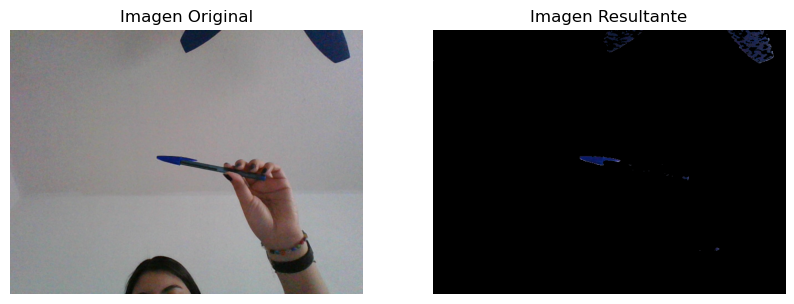

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Capturar un solo fotograma desde la cámara
cap = cv.VideoCapture(0)
_, frame = cap.read()

# Convertir de BGR a HSV
hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

# Definir el rango de color azul en HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Aplicar umbral para obtener solo los colores azules
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Aplicar la operación AND bit a bit entre la máscara y la imagen original
res = cv.bitwise_and(frame, frame, mask=mask)

# Convertir la imagen resultante de OpenCV a RGB para su visualización en Matplotlib
res_rgb = cv.cvtColor(res, cv.COLOR_BGR2RGB)
frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

# Mostrar la imagen original y la imagen resultante juntas en el notebook
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(frame_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(res_rgb)
plt.title('Imagen Resultante')
plt.axis('off')

plt.show()

# Liberar la captura de video
cap.release()

In [ ]:
import cv2 as cv
import numpy as np

# Capturar video desde la cámara
cap = cv.VideoCapture(0)

while True:
    # Capturar cada fotograma
    _, frame = cap.read()
    
    # Convertir de BGR a HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # Definir el rango de color azul en HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    
    # Aplicar umbral para obtener solo los colores azules
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    
    # Aplicar la operación AND bit a bit entre la máscara y la imagen original
    res = cv.bitwise_and(frame, frame, mask=mask)
    
    # Mostrar las imágenes en ventanas separadas
    cv.imshow('frame', frame)
    cv.imshow('mask', mask)
    cv.imshow('res', res)
    
    # Esperar por una tecla y verificar si es la tecla 'Esc' (27 en ASCII)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break

# Cerrar todas las ventanas al salir del bucle
cv.destroyAllWindows()

### <font color='purple'> **1.2 Template Matching** </font>

El emparejamiento de plantillas es un método para buscar y encontrar la ubicación de una imagen de plantilla en una imagen más grande. OpenCV viene con una función `cv.matchTemplate()` para este propósito. Simplemente desliza la imagen de la plantilla sobre la imagen de entrada (como en una convolución 2D) y compara la plantilla y el parche de la imagen de entrada bajo la imagen de la plantilla. Varios métodos de comparación están implementados en OpenCV. Devuelve una imagen en escala de grises, donde cada píxel indica cuánto coincide el vecindario de ese píxel con la plantilla.

Si la imagen de entrada tiene un tamaño de (WxH) y la imagen de la plantilla tiene un tamaño de (wxh), la imagen resultante tendrá un tamaño de (W-w+1, H-h+1). Una vez que se obtiene el resultado, se puede utilizar la función `cv.minMaxLoc()` para determinar la ubicación del valor máximo/mínimo. Este valor se utiliza como la esquina superior izquierda del rectángulo, con (w, h) como las dimensiones del rectángulo. Este rectángulo representa la región de la plantilla.

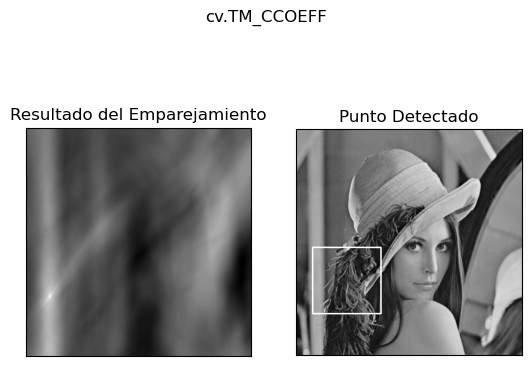

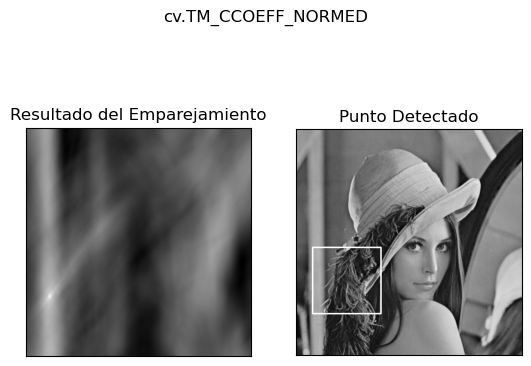

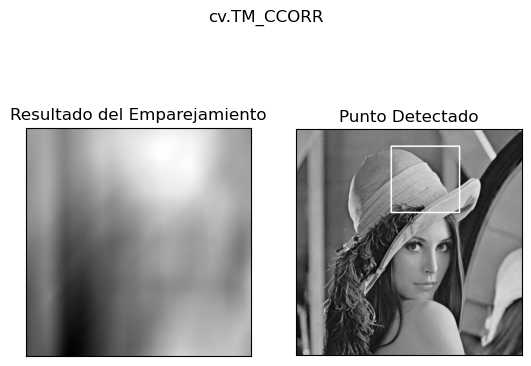

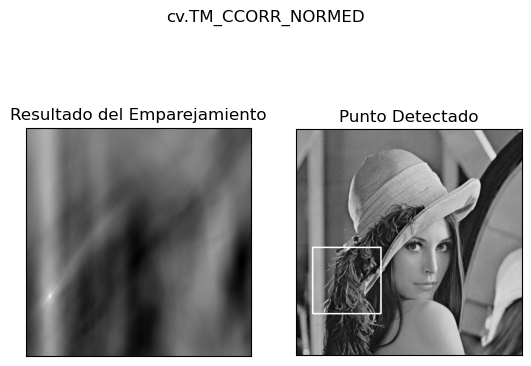

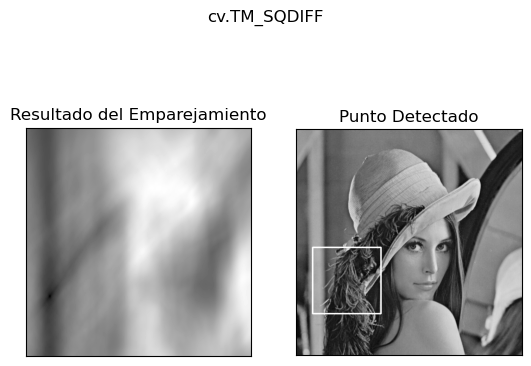

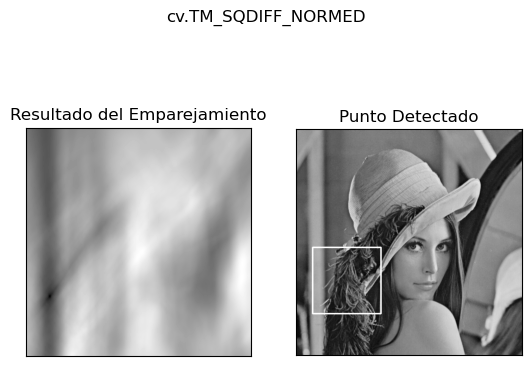

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Leer la imagen y la plantilla en escala de grises
img = cv.imread('Lenna.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "no se pudo leer el archivo, verifica con os.path.exists()"
img2 = img.copy()
template = cv.imread('Lenna_template.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "no se pudo leer el archivo, verifica con os.path.exists()"

# Obtener las dimensiones de la plantilla
w, h = template.shape[::-1]

# Todos los 6 métodos de comparación en una lista
metodos = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Iterar sobre cada método
for metodo in metodos:
    img = img2.copy()
    metodo_actual = eval(metodo)
    
    # Aplicar el emparejamiento de plantillas
    res = cv.matchTemplate(img, template, metodo_actual)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomar el mínimo
    if metodo_actual in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        esquina_superior_izquierda = min_loc
    else:
        esquina_superior_izquierda = max_loc
    
    # Calcular la esquina inferior derecha del rectángulo
    esquina_inferior_derecha = (esquina_superior_izquierda[0] + w, esquina_superior_izquierda[1] + h)
    
    # Dibujar un rectángulo alrededor del área detectada
    cv.rectangle(img, esquina_superior_izquierda, esquina_inferior_derecha, 255, 2)
    
    # Mostrar el resultado del emparejamiento y el área detectada
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Resultado del Emparejamiento'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Punto Detectado'), plt.xticks([]), plt.yticks([])
    plt.suptitle(metodo)
    plt.show()

**Observación:** Únicamente el método de comparación TM_CCORR arrojó un resultado incorrecto.

### <font color='purple'> **1.3 Color Quantization** </font>


La cuantización de color es el proceso de reducir el número de colores en una imagen. Una razón para hacerlo es reducir la memoria. A veces, algunos dispositivos pueden tener limitaciones y solo pueden producir un número limitado de colores. En esos casos, también se realiza la cuantización de color. En este contexto, se utiliza el agrupamiento k-means para la cuantización de color.

No hay nada nuevo que explicar aquí. Hay 3 características, digamos, R, G, B. Por lo tanto, es necesario remodelar la imagen a un arreglo de tamaño Mx3 (M es el número de píxeles en la imagen). Después del agrupamiento, se aplican los valores de los centroides (que también son R, G, B) a todos los píxeles, de modo que la imagen resultante tenga el número especificado de colores. Posteriormente, es necesario volver a remodelarla al tamaño de la imagen original. A continuación se muestra el código:

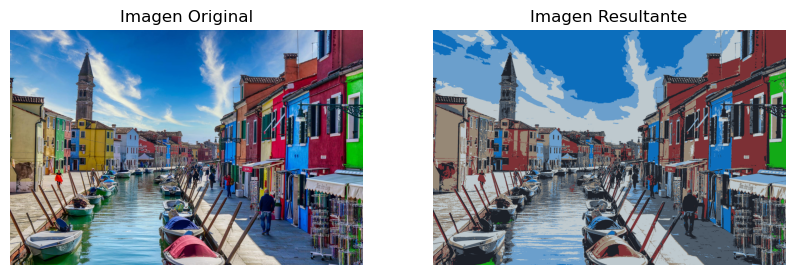

In [7]:
import numpy as np
import cv2 as cv

# Leer la imagen
img = cv.imread('Fotografia.jpg')

# Reorganizar la imagen en una matriz de 3 columnas
Z = img.reshape((-1,3))

# Convertir a np.float32
Z = np.float32(Z)

# Definir los criterios, número de clusters (K) y aplicar kmeans()
criterios = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret, etiqueta, centro = cv.kmeans(Z, K, None, criterios, 10, cv.KMEANS_RANDOM_CENTERS)

# Convertir de nuevo a uint8 y reconstruir la imagen original
centro = np.uint8(centro)
res = centro[etiqueta.flatten()]
res2 = res.reshape((img.shape))

# Mostrar las imágenes 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen original
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Imagen Original')
axs[0].axis('off')

# Mostrar la imagen resultante
axs[1].imshow(cv.cvtColor(res2, cv.COLOR_BGR2RGB))
axs[1].set_title('Imagen Resultante')
axs[1].axis('off')

plt.show()

## <font color='purple'> **2. Scipy** </font>

### <font color='purple'> **2.1 Array transformations** </font>

A continuación utilizaremos la librería Scipy para el tratamiento de un arreglo.

Definimos un arreglo con una cara sonriente:

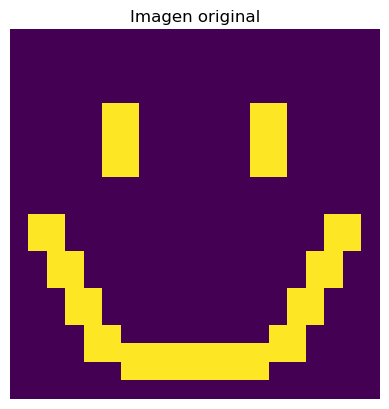

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos una nueva matriz con una cara sonriente
smiley_array = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0,99,99, 0, 0, 0, 0, 0, 0,99,99, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0,99,99, 0, 0, 0, 0, 0, 0,99,99, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0,99,99, 0, 0, 0, 0, 0, 0,99,99, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0,99,99, 0, 0, 0, 0, 0, 0,99,99, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0,99,99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,99,99, 0],
                [0,99,99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,99,99, 0],
                [0, 0,99,99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,99,99, 0, 0],
                [0, 0,99,99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,99,99, 0, 0],
                [0, 0, 0,99,99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,99,99, 0, 0, 0],
                [0, 0, 0,99,99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,99,99, 0, 0, 0],
                [0, 0, 0, 0,99,99, 0, 0, 0, 0, 0, 0, 0, 0,99,99, 0, 0, 0, 0],
                [0, 0, 0, 0,99,99,99,99,99,99,99,99,99,99,99,99, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0,99,99,99,99,99,99,99,99, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Mostrar la imagen
plt.imshow(smiley_array)
plt.axis('off')
plt.title('Imagen original')
plt.show()

Apliquemos un filtrado Gausiano y rotemos la imagen. 

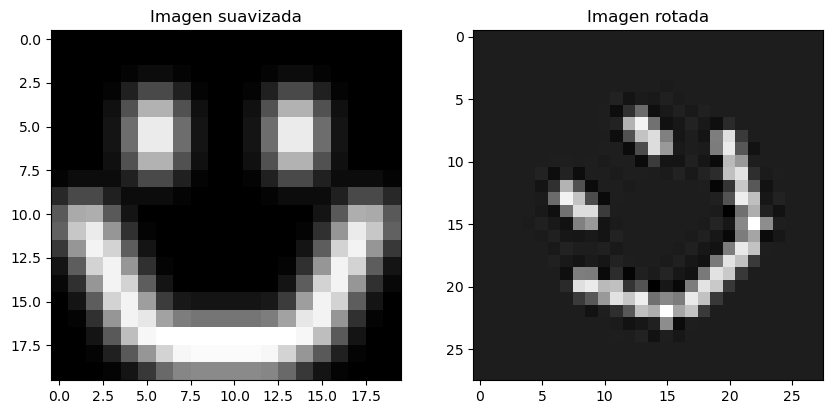

In [55]:
from scipy import ndimage

# 1. Filtrado Gaussiano
smiley_smooth = ndimage.gaussian_filter(smiley_array, sigma=1)

# 2. Rotación
rotated_smiley = ndimage.rotate(smiley_array, angle=45)

# Mostrar las imágenes resultantes
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(smiley_smooth, cmap='gray')
plt.title('Imagen suavizada')

plt.subplot(2, 2, 2)
plt.imshow(rotated_smiley, cmap='gray')
plt.title('Imagen rotada')

plt.show()

A continuación aplicaremos la transformada de fourier y la transformada inversa al arreglo.

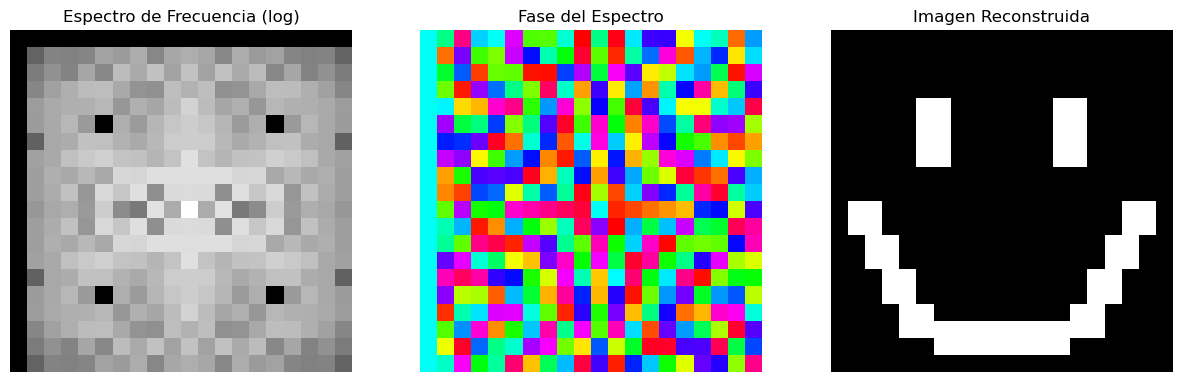

In [45]:
from scipy.fftpack import fft2, ifft2, fftshift

# Aplicar la transformada de Fourier 2D
smiley_fft = fft2(smiley_array)

# Hacer el cambio al centro de la imagen
smiley_fft_shifted = fftshift(smiley_fft)

# Aplicar la transformada inversa de Fourier 2D
smiley_ifft = ifft2(smiley_fft).real  # Tomar solo la parte real de la transformada inversa

# Mostrar las imágenes resultantes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(np.log(1 + np.abs(smiley_fft_shifted)), cmap='gray')
axs[0].set_title('Espectro de Frecuencia (log)')
axs[0].axis('off')

axs[1].imshow(np.angle(smiley_fft_shifted), cmap='hsv')
axs[1].set_title('Fase del Espectro')
axs[1].axis('off')

axs[2].imshow(smiley_ifft, cmap='gray')
axs[2].set_title('Imagen Reconstruida')
axs[2].axis('off')

plt.show()

## <font color='purple'> **3. Pillow** </font>

### <font color='purple'> **3.1 Merging images** </font>

A continuación, vamos a combinar dos imágenes, utilizando una como marca de agua sobre la otra. Para esto, definiremos un arreglo llamado `colors_array`, que será utilizado como marca de agua sobre una imagen de un gato obtenida de Internet.

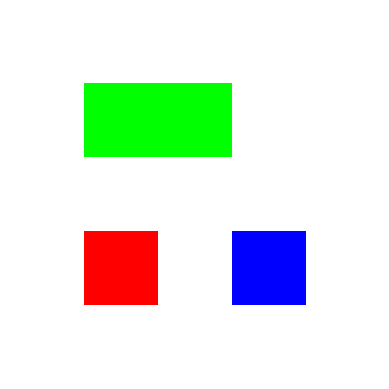

In [90]:
from PIL import Image, ImageFilter
from urllib.request import urlopen
import matplotlib.pyplot as plt

# Definir el arreglo 
colors_array = np.array([
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [0, 255, 0], [0, 255, 0], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 0, 0], [255, 255, 255], [0, 0, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]]
], dtype=np.uint8)

# Mostrar la imagen
plt.imshow(colors_array)
plt.axis('off')
plt.show()

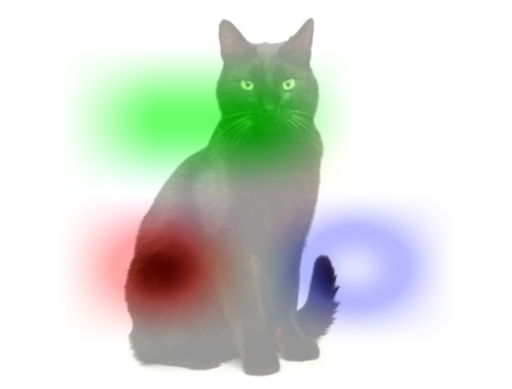

In [88]:
# Crear una imagen a partir del arreglo colors_array
colors_image = Image.fromarray(colors_array)

# Cargar la imagen del gato negro desde URL sin aplicar ningún filtro
url_gato_negro = "https://billiken.lat/wp-content/uploads/2022/12/gato-negro-St.jpg"
gato_negro = Image.open(urlopen(url_gato_negro))

# Redimensionar la imagen de colors_array para que se ajuste al tamaño del gato
colors_resized = colors_image.resize(gato_negro.size)

# Crear una máscara de transparencia para el colors_array
mask = colors_resized.convert("L").point(lambda x: min(x, 150))

# Pegar el colors_array en la imagen del gato negro con la máscara de transparencia
gato_negro.paste(colors_resized, (0, 0), mask)

# Guardar la imagen resultante
merged_image_path = "merged_image.png"

# Mostrar la imagen resultante
plt.imshow(gato_negro)
plt.axis('off')  
plt.show()

Ahora vamos a utilizar `Lenna.png` como marca de agua en la esquina superior izquierda.

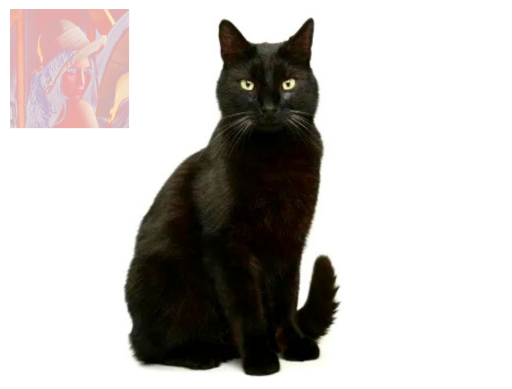

In [91]:
# Cargar la imagen de Lenna y ajustar su tamaño
lenna_path = "Lenna.png"
lenna = Image.open(lenna_path)
lenna = lenna.resize((200, 200))  # Ajustar el tamaño a 200x200 píxeles

# Cargar la imagen del gato negro desde URL
url_gato_negro = "https://billiken.lat/wp-content/uploads/2022/12/gato-negro-St.jpg"
gato_negro = Image.open(urlopen(url_gato_negro))

# Crear una máscara de transparencia para la marca de agua
mask = lenna.convert("L").point(lambda x: min(x, 150))

# Pegar la marca de agua en la imagen del gato negro con la máscara de transparencia
gato_negro.paste(lenna, (0, 0), mask)

# Mostrar la imagen resultante
plt.imshow(gato_negro)
plt.axis('off')  # Desactivar los ejes
plt.show()
